# **Muscular Fatigue Data Analysis - Advanced Electronics - PRA3012**

## Imports of libraries and data

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from scipy import signal
%matplotlib inline

plt.style.use('dark_background')

***
## Using the Short Time Fourier Transforms (STFT)

Text(0.5, 0, 'Time [us]')

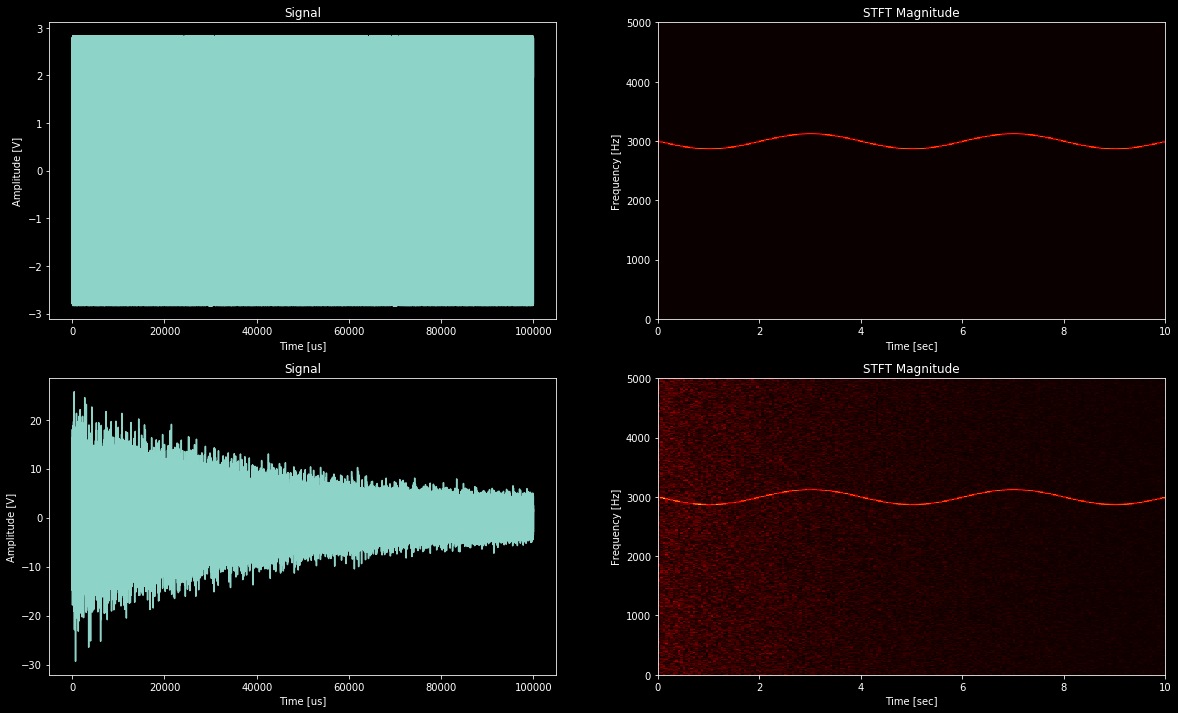

In [2]:
fig, a = plt.subplots(2,2,figsize=(20, 12))

fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power),size=time.shape)
noise *= np.exp(-time/5)
x_clean = carrier
x_noise = carrier + noise

f1, t1, Zxx1 = signal.stft(x_clean, fs, nperseg=1000)
a[0][1].pcolormesh(t1, f1, np.abs(Zxx1), vmin=0, vmax=amp,cmap="hot")
a[0][1].set_title('STFT Magnitude')
a[0][1].set_ylabel('Frequency [Hz]')
a[0][1].set_xlabel('Time [sec]')

f2, t2, Zxx2 = signal.stft(x_noise, fs, nperseg=1000)
a[1][1].pcolormesh(t2, f2, np.abs(Zxx2), vmin=0, vmax=amp,cmap="hot")
a[1][1].set_title('STFT Magnitude')
a[1][1].set_ylabel('Frequency [Hz]')
a[1][1].set_xlabel('Time [sec]')

a[0][0].plot(x_clean)
a[0][0].set_title('Signal')
a[0][0].set_ylabel('Amplitude [V]')
a[0][0].set_xlabel('Time [us]')

a[1][0].plot(x_noise)
a[1][0].set_title('Signal')
a[1][0].set_ylabel('Amplitude [V]')
a[1][0].set_xlabel('Time [us]')

Above we can see how the artificial signal can be broken down into it's frequencies. On the left is the signal, and on the right we can see the spectrogram showing the frequencies present. This specific spectrogram shows that the frequency of the signal oscillates around 3000 Hz.The top graphs are the signal without noise and the bottom ones have noise (see the code). From the outputs of the stft (the frequency spectrum) we can also rebuild the whole signal using a inverse short time fourier transform (istft), as we can see in the code below.

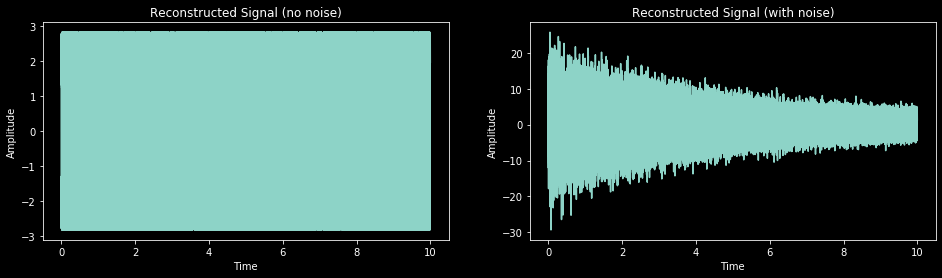

In [3]:
fig, (a0,a1) = plt.subplots(1,2,figsize=(16, 4))
t1,x1 = signal.istft(Zxx1,fs)
t2,x2 = signal.istft(Zxx2,fs)
a0.set_title("Reconstructed Signal (no noise)")
a1.set_title("Reconstructed Signal (with noise)")
a0.set_ylabel("Amplitude")
a1.set_ylabel("Amplitude")
a0.set_xlabel("Time")
a1.set_xlabel("Time")
a0.plot(t1,x1)
a1.plot(t2,x2)

***
## **Data Analysis for the Group of Last Year**

### Dataset Creation

In [0]:
import os
data_pre = []

for file in os.listdir("ParsedData/"):
  if ("toby" not in file) and (".csv" in file):
    data_pre.append(pd.read_csv("/content/drive/My Drive/ParsedDataElectro/"+file))

T = []
V = []
for sample in data_pre:
    T.append(sample["Time (s)"])
    V.append(sample["Kanaal 1"])

fs = 1000

four_pre = []
for i in range(len(data_pre)):
    four_pre.append(signal.stft(V[i], fs))

### Graphing Function

In [0]:
def GraphData_last(T,V,four_pre,numb):
  fig, (a0,a1) = plt.subplots(1,2,figsize=(16, 4))
  a0.plot(T[numb],V[numb])
  cf = a1.pcolormesh(four_pre[numb][1],four_pre[numb][0],np.abs(four_pre[numb][2]),cmap='hot')
  a0.set_xlabel("Time (ms)")
  a1.set_xlabel("Time (s)")
  a0.set_ylabel("Amplitude (mV)")
  a1.set_ylabel("Frequency (Hz)")
  fig.colorbar(cf, ax=a1)

### Graphs

jord


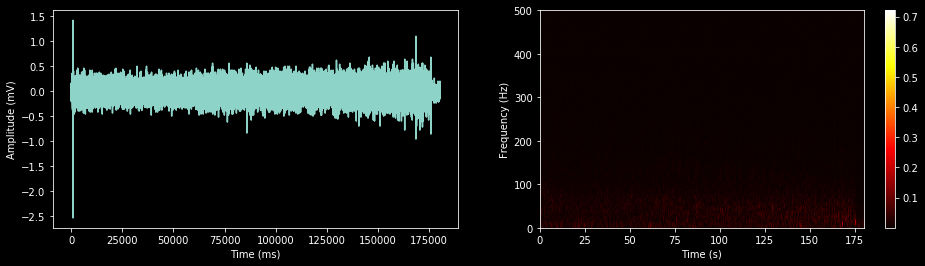

In [6]:
GraphData_last(T,V,four_pre,0)

Irma


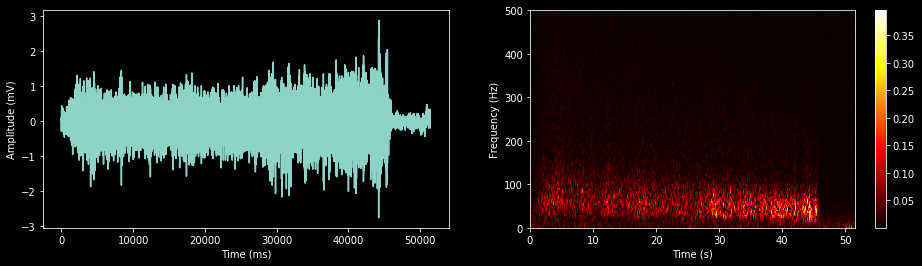

In [7]:
GraphData_last(T,V,four_pre,1)

adrianne


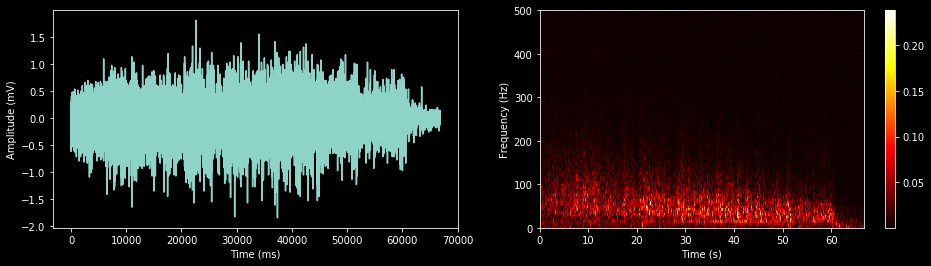

In [8]:
GraphData_last(T,V,four_pre,2)

Shania


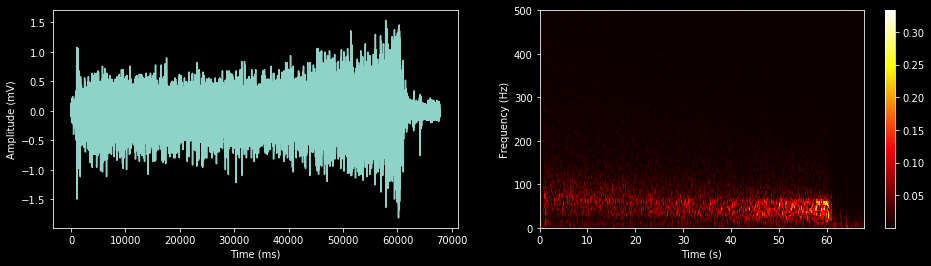

In [9]:
GraphData_last(T,V,four_pre,3)

Marijn


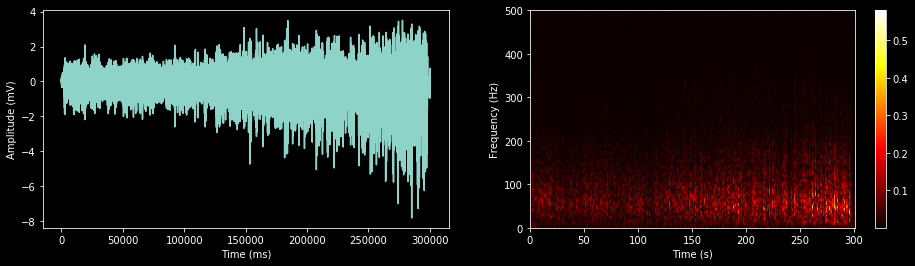

In [10]:
GraphData_last(T,V,four_pre,4)

timour


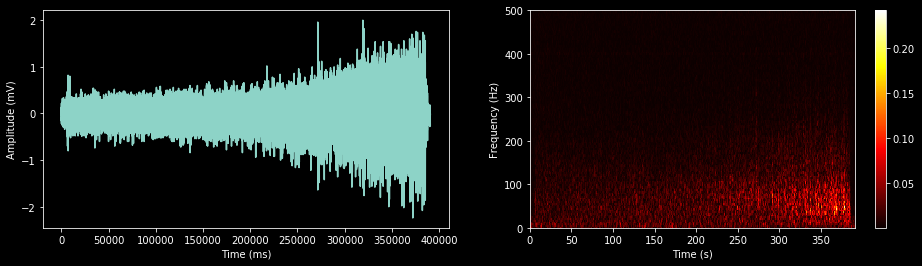

In [11]:
GraphData_last(T,V,four_pre,5)

wladimir


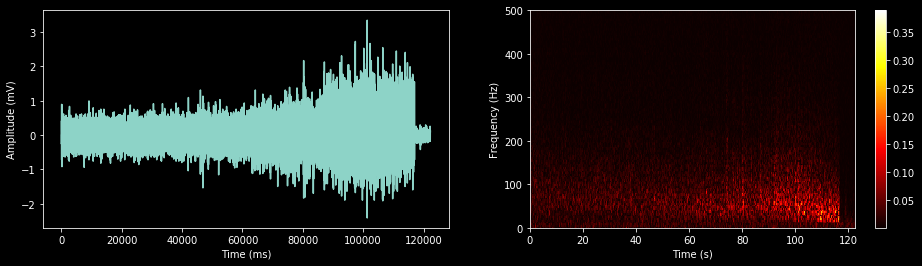

In [12]:
GraphData_last(T,V,four_pre,6)

Zeynep


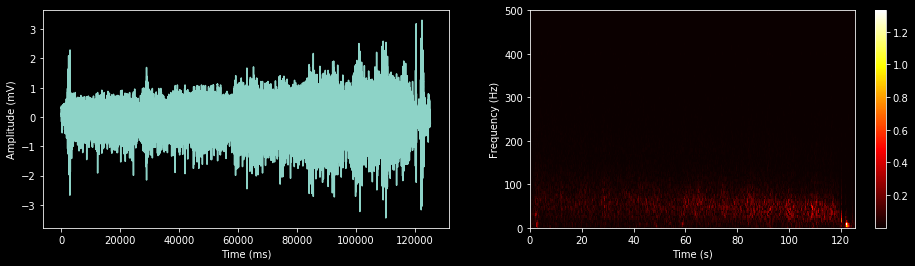

In [13]:
GraphData_last(T,V,four_pre,7)

***
## **Data Analysis for our Group**

### Dataset Creation

In [0]:
data = []
for i in range(14):
    if i+1 < 10:
        data.append(pd.read_csv("ParsedData/toby_00{}_OUT.csv".format(i+1)))
    elif i+1 == 12:
        pass
    else:
        data.append(pd.read_csv("ParsedData/toby_0{}_OUT.csv".format(i+1)))

t = []
v1 = []
v2 = []
for sample in data:
    t.append(sample["Time (s)"])
    v1.append(sample["Kanaal 1"])
    v2.append(sample["Kanaal 5"])

fs1 = 5000

four1 = []
four2 = []
for i in range(13):
    four1.append(signal.stft(v1[i], fs1))
    four2.append(signal.stft(v2[i], fs1))

### Graphing Function

In [0]:
#The change variable is if you need to cut the data shorter. It has to be an array, change[0] can be 0 (need to change first ftft),1 (2nd) or 2 (both)
#and then change[1] is the value from zero to ... . There can be a third value change[2] if you want to change both.
def graphDATA(four1,four2,t,v1,v2,numb,change=False):
  fig, a = plt.subplots(2,2,figsize=(16, 8))
  if change == False:
    a[0][0].plot(t[numb],v1[numb])
    a[1][0].plot(t[numb],v2[numb])
    cf1 = a[0][1].pcolormesh(four1[numb][1],four1[numb][0],np.abs(four1[numb][2]),cmap='hot')
    cf2 = a[1][1].pcolormesh(four2[numb][1],four2[numb][0],np.abs(four2[numb][2]),cmap='hot')
  else:
    if change[0]==0:
      a[0][0].plot(t[numb][:change[1]],v1[numb][:change[1]])
      a[1][0].plot(t[numb],v2[numb])
      four1_Adj = signal.stft(v1[numb][:change[1]], fs1)
      cf1 = a[0][1].pcolormesh(four1_Adj[1],four1_Adj[0],np.abs(four1_Adj[2]),cmap='hot')
      cf2 = a[1][1].pcolormesh(four2[numb][1],four2[numb][0],np.abs(four2[numb][2]),cmap='hot')
    elif change[0]==1:
      a[0][0].plot(t[numb],v1[numb])
      a[1][0].plot(t[numb][:change[1]],v2[numb][:change[1]])
      four2_Adj = signal.stft(v1[numb][:change[1]], fs1)
      cf1 = a[0][1].pcolormesh(four1[numb][1],four1[numb][0],np.abs(four1[numb][2]),cmap='hot')
      cf2 = a[1][1].pcolormesh(four2_Adj[1],four2_Adj[0],np.abs(four2_Adj[2]),cmap='hot')
    elif change[0]==2:
      a[0][0].plot(t[numb][:change[1]],v1[numb][:change[1]])
      a[1][0].plot(t[numb][:change[2]],v2[numb][:change[2]])
      four1_Adj = signal.stft(v1[numb][:change[1]], fs1)
      four2_Adj = signal.stft(v1[numb][:change[2]], fs1)
      cf1 = a[0][1].pcolormesh(four1_Adj[1],four1_Adj[0],np.abs(four1_Adj[2]),cmap='hot')
      cf2 = a[1][1].pcolormesh(four2_Adj[1],four2_Adj[0],np.abs(four2_Adj[2]),cmap='hot')

  a[0][0].set_xlabel("Time (ms)")
  a[0][1].set_xlabel("Time (s)")
  a[0][0].set_ylabel("Amplitude (mV)")
  a[0][1].set_ylabel("Frequency (Hz)")
  a[1][0].set_xlabel("Time (ms)")
  a[1][1].set_xlabel("Time (s)")
  a[1][0].set_ylabel("Amplitude (mV)")
  a[1][1].set_ylabel("Frequency (Hz)")
  a[0][1].set_ylim(0,1000)
  a[1][1].set_ylim(0,1000)
  fig.colorbar(cf1, ax=a[0][1])
  fig.colorbar(cf2, ax=a[1][1])

### Graphs

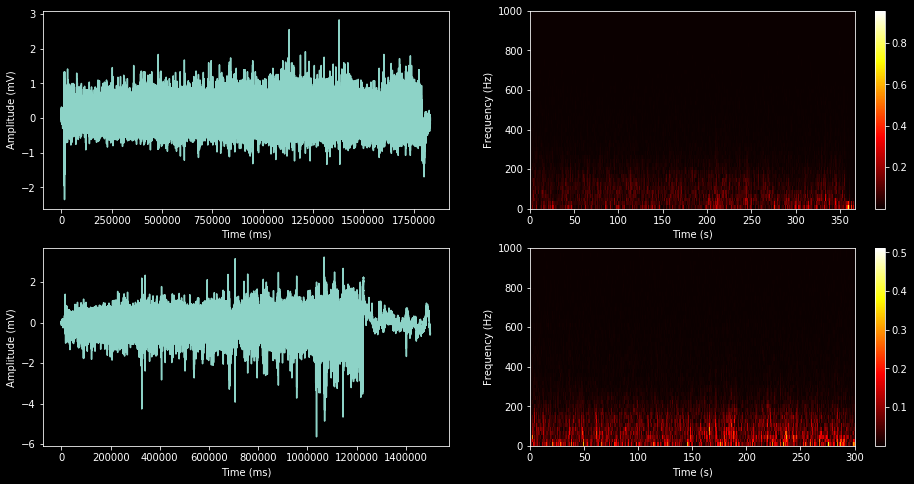

In [16]:
graphDATA(four1,four2,t,v1,v2,0,[1,1500000])

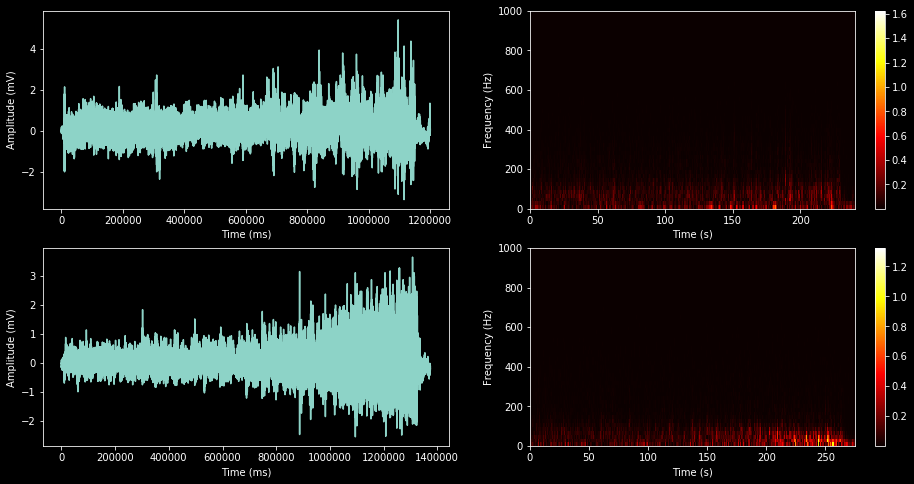

In [17]:
graphDATA(four1,four2,t,v1,v2,1,[0,1200000])

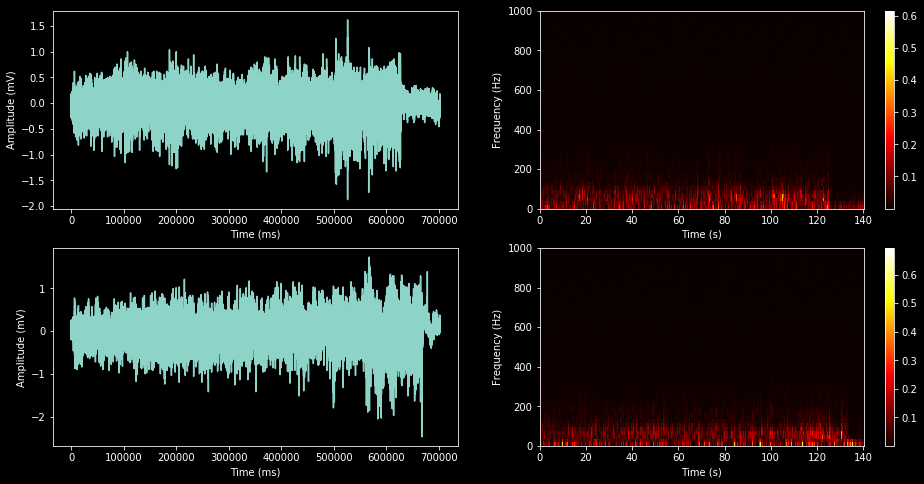

In [18]:
graphDATA(four1,four2,t,v1,v2,2)

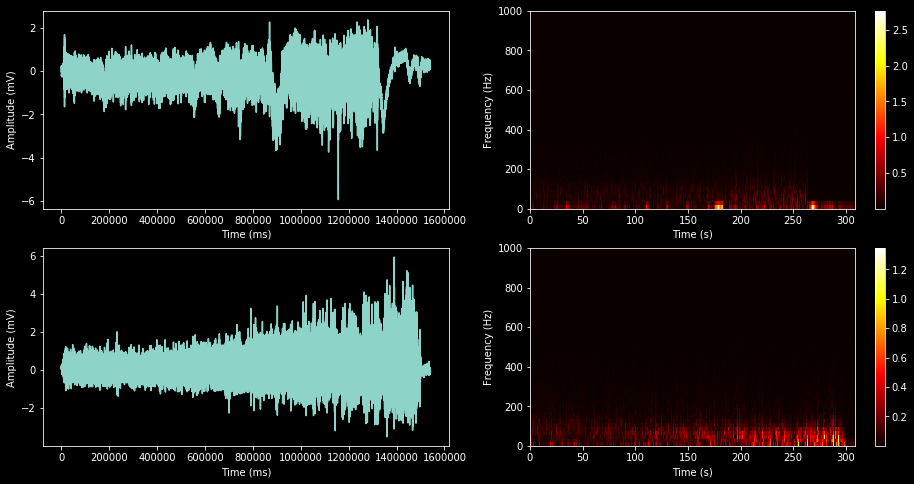

In [19]:
graphDATA(four1,four2,t,v1,v2,3)

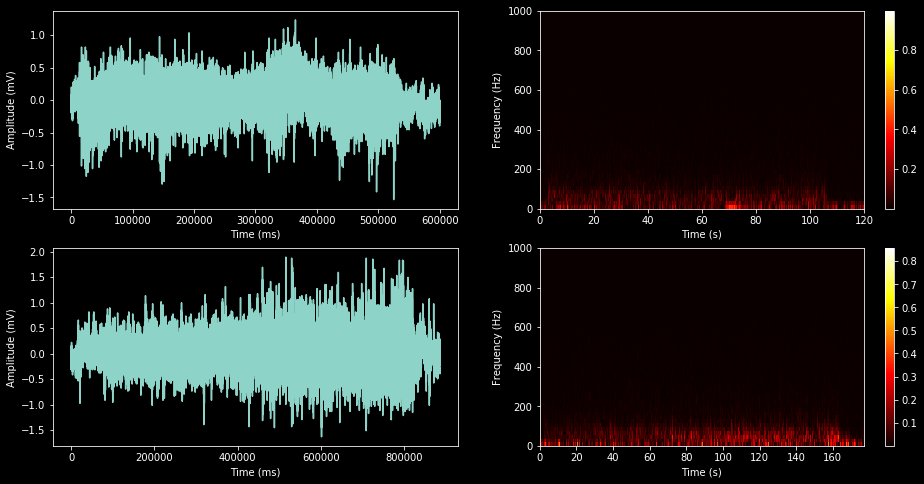

In [20]:
graphDATA(four1,four2,t,v1,v2,4,change=[0,600000])

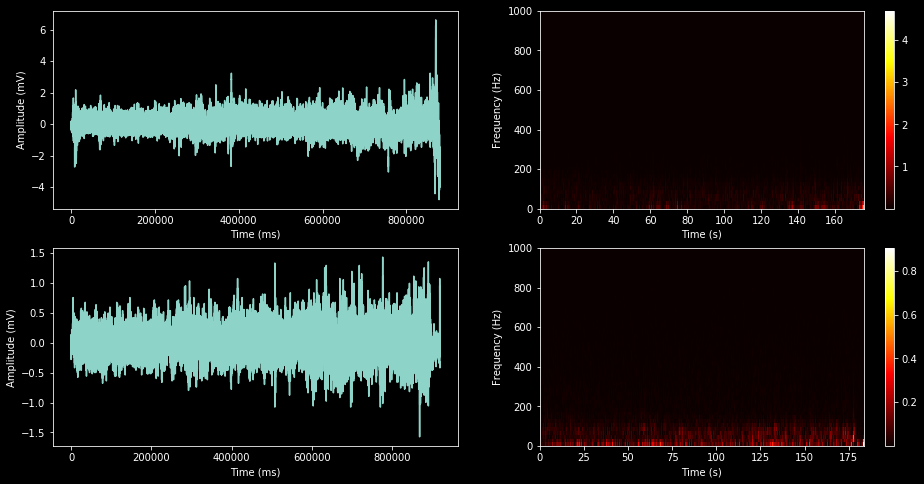

In [21]:
graphDATA(four1,four2,t,v1,v2,5,[0,880000])

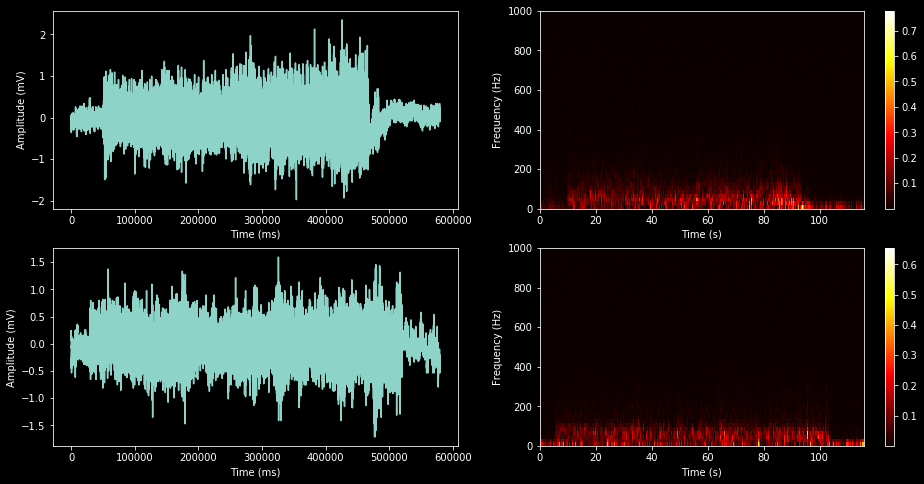

In [22]:
graphDATA(four1,four2,t,v1,v2,6)

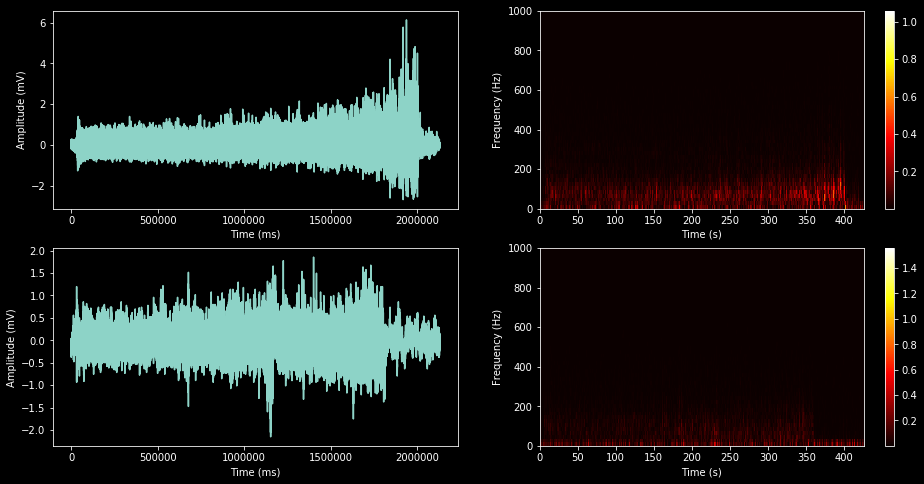

In [23]:
graphDATA(four1,four2,t,v1,v2,7)

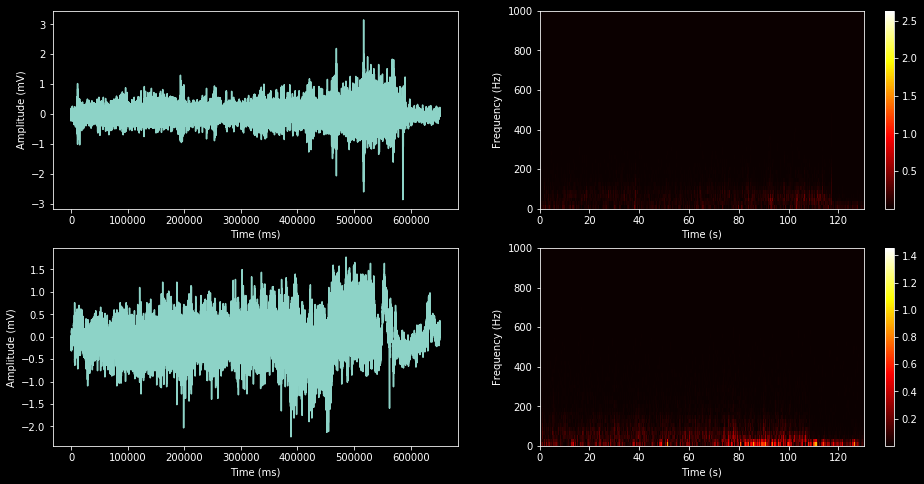

In [24]:
graphDATA(four1,four2,t,v1,v2,8)

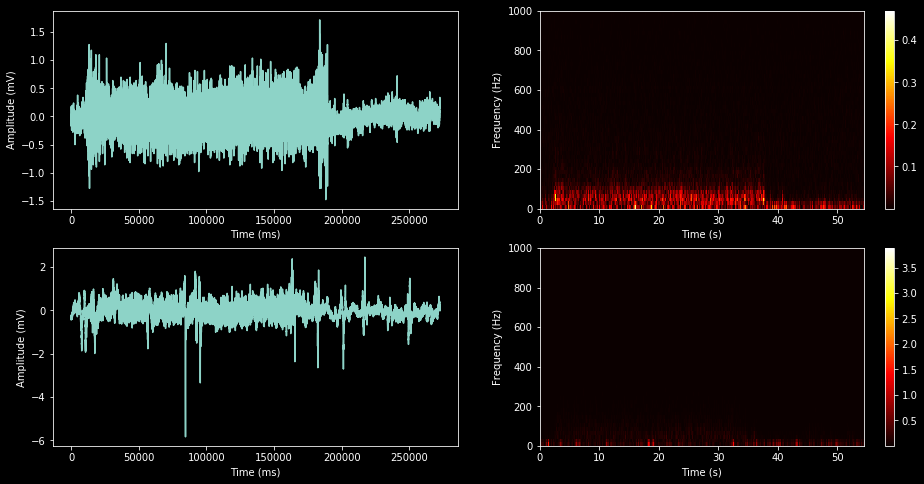

In [25]:
graphDATA(four1,four2,t,v1,v2,9)

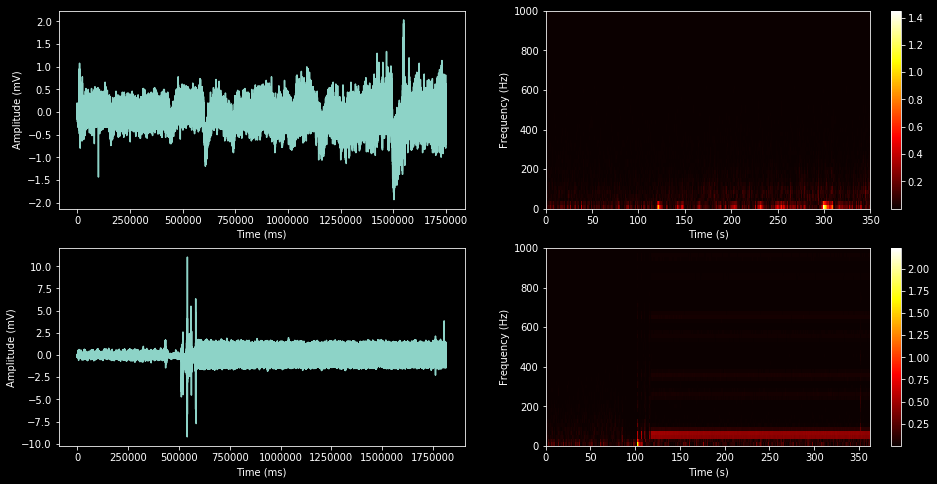

In [26]:
graphDATA(four1,four2,t,v1,v2,10,[0,1750000])

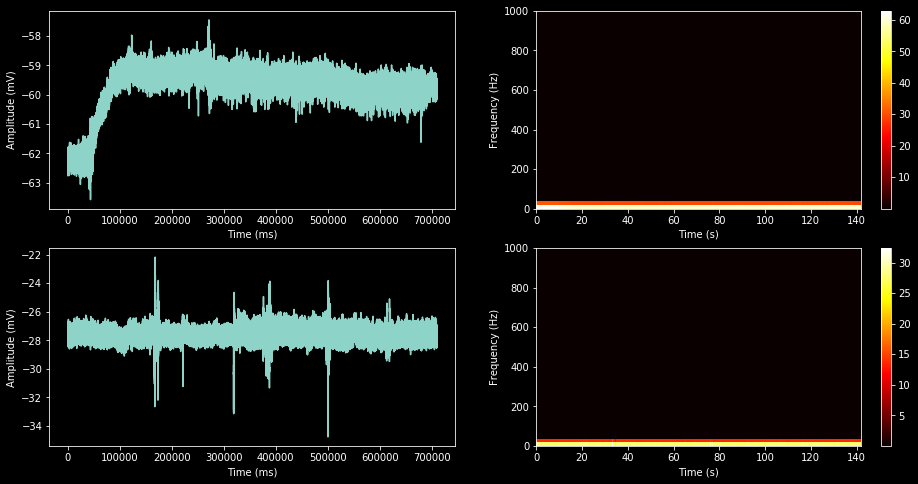

In [27]:
graphDATA(four1,four2,t,v1,v2,11)

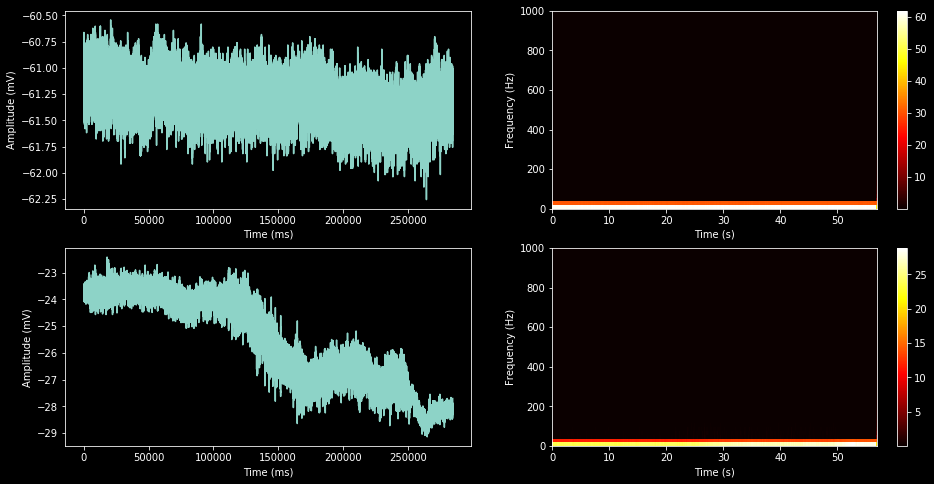

In [28]:
graphDATA(four1,four2,t,v1,v2,12)